In [1]:
import requests
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def seek(id):
    urls = ['https://www.seek.com.au/job/', 'https://www.seek.com.au/expiredjob/']
    r = requests.get(urls[0] + str(id))
    
    soup = BeautifulSoup(r.content, 'html.parser')

    if 'body-joblisting-index' in soup.body['class']:
        _seek_wordcloud(urls[0] + str(id))
    else:
        print('Job expired')
        _seek_wordcloud(urls[1] + str(id))

In [3]:
def _seek_wordcloud(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
        
    title = soup.find('h1', class_='jobtitle').string.strip()
    description = soup.find('div', class_='templatetext').get_text()
    _get_wordcloud(title + description)

In [4]:
def _get_wordcloud(text):
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.figure(figsize=(13, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

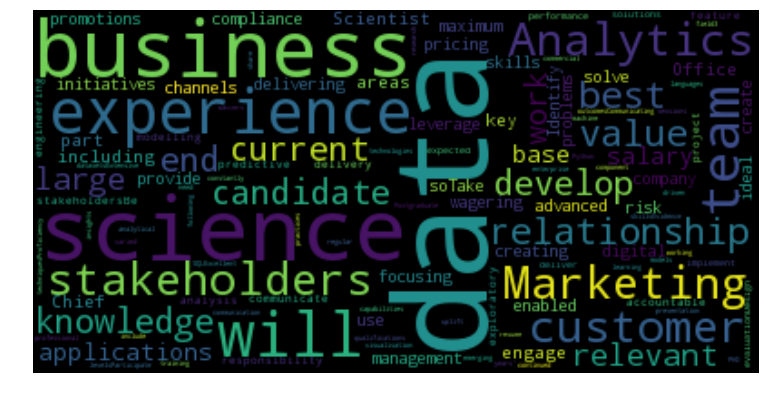

In [5]:
seek(33095266)